# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
validation_file= "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

### Preprocessing: Convert to grayscale

In [7]:
import numpy as np

# X_train_grayscale = np.zeros((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
# X_valid_grayscale = np.zeros((X_valid.shape[0], X_valid.shape[1], X_valid.shape[2], 1))
# X_test_grayscale = np.zeros((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

def average(rgb_pixels):
    return (rgb_pixels[0] + rgb_pixels[1] + rgb_pixels[2]) / 3

def rgb_to_grayscale(images):
    gray_images = np.zeros((images.shape[0], images.shape[1], images.shape[2], 1))
    for index in range(len(images)):
        if index % 500 == 0:
            print("doing job: ", index)
        example_img = images[index]
        for row_num in range(len(example_img)):
            for col_num in range(len(example_img[row_num])):
                gray_images[index][row_num][col_num] = np.average(example_img[row_num][col_num])
    return gray_images

X_train_grayscale = rgb_to_grayscale(X_train)
X_valid_grayscale = rgb_to_grayscale(X_valid)
X_test_grayscale = rgb_to_grayscale(X_test)


doing job:  0
doing job:  500
doing job:  1000
doing job:  1500
doing job:  2000
doing job:  2500
doing job:  3000
doing job:  3500
doing job:  4000
doing job:  4500
doing job:  5000
doing job:  5500
doing job:  6000
doing job:  6500
doing job:  7000
doing job:  7500
doing job:  8000
doing job:  8500
doing job:  9000
doing job:  9500
doing job:  10000
doing job:  10500
doing job:  11000
doing job:  11500
doing job:  12000
doing job:  12500
doing job:  13000
doing job:  13500
doing job:  14000
doing job:  14500
doing job:  15000
doing job:  15500
doing job:  16000
doing job:  16500
doing job:  17000
doing job:  17500
doing job:  18000
doing job:  18500
doing job:  19000
doing job:  19500
doing job:  20000
doing job:  20500
doing job:  21000
doing job:  21500
doing job:  22000
doing job:  22500
doing job:  23000
doing job:  23500
doing job:  24000
doing job:  24500
doing job:  25000
doing job:  25500
doing job:  26000
doing job:  26500
doing job:  27000
doing job:  27500
doing job:  2800

NameError: name 'os' is not defined

### Preprocessing: scale the image up by a factor of 2
I couldn't end up using this method because it kept on giving me memory issues since the images, now doubled in dimensions, take too much memory and disk space

In [1]:
import numpy as np
import cv2

def scale_images(images, scale_factor): # double the width and height of the images
    scaled_images = np.zeros((images.shape[0], images.shape[1]*scale_factor, images.shape[2] * scale_factor, 3))
    for index in range(len(images)):
        if index % 2000 == 0:
            print("doing job: ", index)
        example_img = images[index]
        scaled_image = cv2.resize(example_img,None,fx=scale_factor,fy=scale_factor,interpolation=cv2.INTER_AREA)
        scaled_images[index] = scaled_image
    return scaled_images

X_train_scaled = scale_images(X_train,2)
X_valid_scaled = scale_images(X_valid,2)
X_test_scaled = scale_images(X_test,2)

# reassign X_train, X_valid and X_test
X_train = X_train_scaled
X_valid = X_valid_scaled
X_test = X_test_scaled

print("this is X_train_scaled shape: ", X_train.shape)

NameError: name 'X_train' is not defined

### Preprocessing: Translation

In [2]:
import numpy as np
import cv2
import random

def translate_images(images,translation_factor):
    translated_images = np.zeros((images.shape[0], images.shape[1], images.shape[2], 3))
    rand_t_factor = random.randint(-translation_factor, translation_factor)
    for index in range(len(images)):
        if index % 2000 == 0:
            print("doing job: ", index)
        example_img = images[index]
        
        rows = example_img.shape[0]
        cols = example_img.shape[1]

        M = np.float32([[1,0,rand_t_factor],[0,1,rand_t_factor]])
        translated_image = cv2.warpAffine(example_img,M,(cols,rows))
        translated_images[index] = translated_image
    return translated_images

X_train_translated = translate_images(X_train,4) #moving 2 pixels in both X,Y should not change the image too much
X_valid_translated = translate_images(X_valid,4)
X_test_translated = translate_images(X_test,4)

# reassign X_train, X_valid and X_test
X_train = X_train_translated
X_valid = X_valid_translated
X_test = X_test_translated

print("this is X_train_translated shape: ", X_train.shape)

doing job:  0
doing job:  2000
doing job:  4000
doing job:  6000
doing job:  8000
doing job:  10000
doing job:  12000
doing job:  14000
doing job:  16000
doing job:  18000
doing job:  20000
doing job:  22000
doing job:  24000
doing job:  26000
doing job:  28000
doing job:  30000
doing job:  32000
doing job:  34000
doing job:  0
doing job:  2000
doing job:  4000
doing job:  0
doing job:  2000
doing job:  4000
doing job:  6000
doing job:  8000
doing job:  10000
doing job:  12000
this is X_train_translated shape:  (34799, 32, 32, 3)


### Preprocessing: rotation

In [2]:
import numpy as np
import cv2
import random

def rotate_images(images,rotation_angle):
    rotated_images = np.zeros((images.shape[0], images.shape[1], images.shape[2], 3))
    rand_r_angle = random.randint(-rotation_angle, rotation_angle)
    for index in range(len(images)):
        if index % 2000 == 0:
            print("doing job: ", index)
        example_img = images[index]
        
        rows = example_img.shape[0]
        cols = example_img.shape[1]

        M = cv2.getRotationMatrix2D((cols/2,rows/2),rand_r_angle,1)
        rotated_image = cv2.warpAffine(example_img,M,(cols,rows))
        rotated_images[index] = rotated_image
    return rotated_images

X_train_rotated = rotate_images(X_train,90) #rotate image by any value between -90 and 90
X_valid_rotated = rotate_images(X_valid,90)
X_test_rotated = rotate_images(X_test,90)

# reassign X_train, X_valid and X_test
X_train = X_train_rotated
X_valid = X_valid_rotated
X_test = X_test_rotated

print("this is X_train_translated shape: ", X_train.shape)

doing job:  0
doing job:  2000
doing job:  4000
doing job:  6000
doing job:  8000
doing job:  10000
doing job:  12000
doing job:  14000
doing job:  16000
doing job:  18000
doing job:  20000
doing job:  22000
doing job:  24000
doing job:  26000
doing job:  28000
doing job:  30000
doing job:  32000
doing job:  34000
doing job:  0
doing job:  2000
doing job:  4000
doing job:  0
doing job:  2000
doing job:  4000
doing job:  6000
doing job:  8000
doing job:  10000
doing job:  12000
this is X_train_translated shape:  (34799, 32, 32, 3)


In [27]:
import os
# save objects to pickle file
# pickle_file = 'grayscale_images.pickle'
pickle_file = 'scaled_images.pickle'

if not os.path.isfile(pickle_file):
    print('Saving data to pickle file...')
    try:
        with open(pickle_file, 'wb') as pfile:
            pickle.dump(
                {
                    'train_scaled': X_train_scaled,
                    'valid_scaled': X_valid_scaled,
                    'test_scaled': X_test_scaled
                },
                pfile, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
        raise

print('Data cached in pickle file.')


Saving data to pickle file...
Unable to save data to scaled_images.pickle : [Errno 28] No space left on device


OSError: [Errno 28] No space left on device

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Reload the data

In [15]:
import pickle
import os
import numpy as np

training_file = "traffic-signs-data/train.p"
validation_file= "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
y_train = train['labels']
y_valid = valid['labels']
y_test = test['labels']

# comment out code below to switch back and forth between grayscale and rgb
#rgb
X_train = train['features']
X_valid = valid['features']
X_test = test['features']

# #grayscale
# pickle_file = 'grayscale_images.pickle'
# with open(pickle_file, 'rb') as f:
#   pickle_data = pickle.load(f)
#   X_train = pickle_data['train_grayscale']
#   X_valid = pickle_data['valid_grayscale']
#   X_test = pickle_data['test_grayscale']
#   del pickle_data  # Free up memory

#scaled images
# pickle_file = 'scaled_images.pickle'

# scores = {} # scores is an empty dict already

# if os.path.getsize(pickle_file) > 0:      
#     with open(pickle_file, "rb") as file:
#         unpickler = pickle.Unpickler(file)
#         scores = unpickler.load()

# print("this is scores: ", scores)

# with open(pickle_file, 'rb') as f:
#     print("this is f: ", f)
#     pickle_data = pickle.load(f)
#     X_train = pickle_data['train_scaled']
#     X_valid = pickle_data['valid_scaled']
#     X_test = pickle_data['test_scaled']
#     del pickle_data  # Free up memory


print('Data and modules loaded.')

Data and modules loaded.


### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [16]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

n_valid = len(X_valid)

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples = ", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("shape of y_train: ", y_train.shape)
# print("this is y_train[200:250]: ", y_train[200:250])
# print("this is image 0: ", X_train[0])

Number of training examples = 34799
Number of validation examples =  4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
shape of y_train:  (34799,)


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [17]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

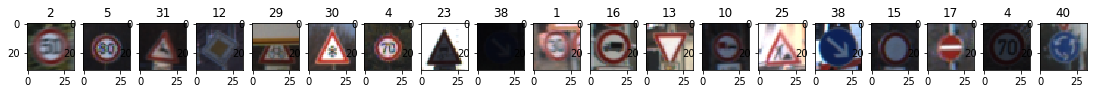

In [19]:
# 1) LeNet approach
import random

img_count = 20 # sample 20 random images to show
fig = plt.figure(figsize=(img_count,img_count)) #set the size of the image plot
for i in range(1,img_count):
    index = random.randint(0, n_train) #the index of a random training example
    image = X_train[index].squeeze() #'flatten' the array
    subplot = fig.add_subplot(1,img_count,i)
    subplot.set_title(y_train[index])
#     subplot.set_title(y_train[index] + index)
#     plt.imshow(image, cmap="gray")
    plt.imshow(image)
    
# bar chart
# fig, ax = plt.subplots()



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [20]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

#shuffle the data because unshuffled data may cause the neural network to have a certain bias
X_train, y_train = shuffle(X_train, y_train) 

### Model Architecture

In [21]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [22]:
import tensorflow as tf

print("imported tensorflow")

EPOCHS = 20
BATCH_SIZE = 200

imported tensorflow


In [23]:
# implement the LeNet architecture

from tensorflow.contrib.layers import flatten

def LeNet(x, keep_prob):
    print("in lenet, shape of x: ", x.get_shape())
    
    mu = 0
    sigma = 0.05
    
    # Layer one: CNN layer, converting input of 32x32x3 to output of 32x32x12 setting weights and bias for the first CNN layer
    W = tf.Variable(tf.truncated_normal([5,5,3,12], mu, sigma))
    b = tf.Variable(tf.truncated_normal([12], mu, sigma))
    
    x = tf.nn.conv2d(x, W, strides=[1,1,1,1], padding="SAME")
    x = tf.nn.bias_add(x, b)
    
    # activation layer
    x = tf.nn.relu(x)
    
    print("this is x just before pooling: ", x.get_shape())
    
    # pooling layer input = 32x32x12, output=16x16x12
    x = tf.nn.max_pool(
        x,
        ksize=[1,2,2,1],
        strides=[1,2,2,1],
        padding="VALID"
    )
    
    print("this is x after layer one: ", x.get_shape())
        
    # no max pool operation
    
    # Layer two: CNN Layer, converting input of 16x16x12, output=12x12x22
    W = tf.Variable(tf.truncated_normal([5,5,12,22], mu, sigma))
    b = tf.Variable(tf.truncated_normal([22], mu, sigma))
    
    x = tf.nn.conv2d(x, W, strides=[1,1,1,1], padding="VALID")
    x = tf.nn.bias_add(x, b)
    
    print("this is x after layer two: ", x.get_shape())
    
    # activation layer
    x = tf.nn.relu(x)
    
    # dropout
    x = tf.nn.dropout(x, keep_prob)
    
    # pooling layer input=12x12x22, output=6x6x22
    x = tf.nn.max_pool(
        x,
        ksize=[1,2,2,1],
        strides=[1,2,2,1],
        padding="VALID"
    )
    
    print("this is shape of x: ", x.get_shape())
    
    # Layer two point five, input 6x6x22, output 4x4x50
    W = tf.Variable(tf.truncated_normal([3,3,22,50], mu, sigma))
    b = tf.Variable(tf.truncated_normal([50], mu, sigma))
    
    x = tf.nn.conv2d(x, W, strides=[1,1,1,1], padding="VALID")
    x = tf.nn.bias_add(x, b)
        
    # activation
    x = tf.nn.relu(x)
    # dropout
    x = tf.nn.dropout(x, keep_prob)
    
    print("this is shape of x before flatten: ", x.get_shape())
    
    # Layer three: fully connected layer
    # flatten first, input=4x4x50, output=800, 1D vector
    x = tf.contrib.layers.flatten(x)
    
    # input=800, output=120
    input_count=800
    output_count = 120
    W = tf.Variable(tf.truncated_normal([input_count, output_count], mu, sigma))
    b = tf.Variable(tf.truncated_normal([output_count], mu, sigma))
    
    x = tf.matmul(x, W)
    x = tf.add(x, b)
    
    # activation
    x = tf.nn.relu(x)
    
    # dropout
    x = tf.nn.dropout(x, keep_prob)
    
    # Layer four: Fully Connected. Input = 120. Output = 84.
    input_count = 120
    output_count = 84
    W = tf.Variable(tf.truncated_normal([input_count, output_count],mu,sigma))
    b = tf.Variable(tf.truncated_normal([output_count],mu,sigma))
    
    x = tf.matmul(x, W)
    x = tf.add(x, b)
    
    # Activation.
    x = tf.nn.relu(x)
    
    # dropout
    x = tf.nn.dropout(x, keep_prob)

    # Layer five: Fully Connected. Input = 84. Output = 43.
    input_count = 84
    output_count = 43
    W = tf.Variable(tf.truncated_normal([input_count, output_count], mu, sigma))
    b = tf.Variable(tf.truncated_normal([output_count], mu, sigma))
    
    x = tf.matmul(x, W)
    x = tf.add(x, b)
    
    logits = x
    return logits
    
    

### Features and Labels

In [24]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3)) # None represents the number of training samples
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

### Training Pipeline

In [25]:
rate = 0.001 #learning rate

logits = LeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=rate)
training_operation = optimizer.minimize(loss_operation)

in lenet, shape of x:  (?, 32, 32, 3)
this is x just before pooling:  (?, 32, 32, 12)
this is x after layer one:  (?, 16, 16, 12)
this is x after layer two:  (?, 12, 12, 22)
this is shape of x:  (?, 6, 6, 22)
this is shape of x before flatten:  (?, 4, 4, 50)


### Model Evaluation

In [26]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


### Train the model

In [27]:
import datetime

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    start_time = datetime.datetime.now()
    
    print("Training...")
    print()

    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y= X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.75})
        
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH: ", i+1)
        print("Validation accuracy: {:.3f}".format(validation_accuracy))
        print("time taken: ", datetime.datetime.now() - start_time)
        print()
    
    saver.save(sess, './lenet')
    print("Model saved")
    
    end_time = datetime.datetime.now()
    
    print("time taken: ", end_time - start_time)
    

Training...

EPOCH:  1
Validation accuracy: 0.793
time taken:  0:00:04.595720

EPOCH:  2
Validation accuracy: 0.884
time taken:  0:00:09.157877

EPOCH:  3
Validation accuracy: 0.919
time taken:  0:00:13.710629

EPOCH:  4
Validation accuracy: 0.923
time taken:  0:00:18.267235

EPOCH:  5
Validation accuracy: 0.937
time taken:  0:00:22.823738

EPOCH:  6
Validation accuracy: 0.953
time taken:  0:00:27.384216

EPOCH:  7
Validation accuracy: 0.956
time taken:  0:00:31.938652

EPOCH:  8
Validation accuracy: 0.947
time taken:  0:00:36.491173

EPOCH:  9
Validation accuracy: 0.958
time taken:  0:00:41.048593

EPOCH:  10
Validation accuracy: 0.961
time taken:  0:00:45.603217

EPOCH:  11
Validation accuracy: 0.964
time taken:  0:00:50.161430

EPOCH:  12
Validation accuracy: 0.958
time taken:  0:00:54.722582

EPOCH:  13
Validation accuracy: 0.960
time taken:  0:00:59.288260

EPOCH:  14
Validation accuracy: 0.970
time taken:  0:01:03.842031

EPOCH:  15
Validation accuracy: 0.964
time taken:  0:01:08

In [28]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

this is test_images:  (9, 32, 32, 3)


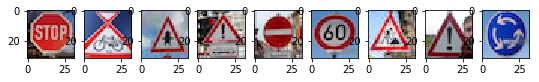

In [29]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg

test_image_count = 9
fig = plt.figure(figsize=(test_image_count,test_image_count))

test_images_folder_name = "test_images_found_online/"
test_images_folder = os.listdir(test_images_folder_name)

test_images = np.zeros((test_image_count, 32, 32, 3)) 

for i in range(test_image_count):
    test_image_file = test_images_folder[i]
    image = mpimg.imread("test_images_found_online/" + test_image_file)
    test_images[i] = np.copy(image)
    image = image.squeeze()
    subplot = fig.add_subplot(1,test_image_count,i+1)
    plt.imshow(image)
    
print("this is test_images: ", test_images.shape)

y_test_images = np.array([14, 29, 11, 18, 17, 3, 25, 18, 40])


### Predict the Sign Type for Each Image

In [30]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Accuracy on test data set = {:.3f}".format(test_accuracy))


# x = tf.placeholder(tf.float32, (None, 32, 32, 3)) # None represents the number of training samples
# keep_prob = tf.placeholder(tf.float32)

# logits = LeNet(x, keep_prob) #need to have this here for some reason, else I get a Placeholder_12 type error
# softmax = tf.nn.softmax(logits)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print("running tf session")
#     prediction1 = tf.argmax(logits, 1)
#     output = sess.run(prediction1, feed_dict={x: test_images, keep_prob: 1.0})
    softmax = tf.nn.softmax(logits)
    output = sess.run(softmax, feed_dict={x: test_images, keep_prob: 1.0})

print("this is output: ", output)

Accuracy on test data set = 0.942
running tf session
this is output:  [[  8.72512063e-10   3.32233299e-08   7.48118012e-09   1.42035082e-11
    2.30198320e-13   9.09256492e-09   3.06360350e-19   5.77446077e-13
    6.24222340e-11   1.32008987e-11   3.87548926e-09   1.48900814e-12
    3.20010164e-11   6.43115353e-11   9.99999285e-01   4.79578963e-12
    8.67253956e-18   4.18523115e-07   2.84494248e-15   1.45824735e-14
    5.44849593e-13   1.40772729e-13   1.85420269e-13   1.11953170e-15
    9.20993005e-16   9.05171138e-09   1.56707676e-12   1.17453093e-15
    9.78785282e-12   1.90798005e-07   1.32864301e-11   3.15350807e-14
    9.88038787e-18   7.14027260e-15   2.28636046e-14   8.47737096e-16
    5.28260502e-17   4.35210610e-16   3.47536907e-14   3.50660137e-19
    7.22366426e-16   4.56408351e-16   2.97151519e-16]
 [  4.36756536e-02   4.49600490e-03   1.46850871e-04   1.57797965e-03
    2.87451490e-04   3.90175119e-04   2.19936965e-07   7.47045444e-04
    2.05682039e-01   7.30859814e-04 

### Analyze Performance

In [18]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print("running tf session")
    test_accuracy = evaluate(test_images, y_test_images)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    

running tf session
Test Accuracy = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [20]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    softmax = tf.nn.softmax(logits)
    top_5 = sess.run(tf.nn.top_k(softmax, k=5), feed_dict={x: test_images, keep_prob: 1.0})

print("this is top 5: ", top_5)
    

this is top 5:  TopKV2(values=array([[  1.00000000e+00,   4.37989263e-11,   1.54517593e-13,
          6.46940419e-16,   4.32372997e-16],
       [  8.67700040e-01,   6.09812662e-02,   1.92172341e-02,
          1.90091971e-02,   8.73475615e-03],
       [  9.99999881e-01,   1.08874737e-07,   2.00479806e-11,
          1.80574685e-12,   8.16136506e-14],
       [  8.72290254e-01,   1.27083227e-01,   3.47209541e-04,
          1.34866845e-04,   4.70603809e-05],
       [  9.99998331e-01,   1.65018912e-06,   1.77416837e-08,
          4.21988888e-10,   1.43267741e-11],
       [  9.66812849e-01,   2.25130320e-02,   9.59394127e-03,
          1.06082740e-03,   1.43425532e-05],
       [  1.00000000e+00,   3.42832585e-09,   6.10181990e-13,
          3.73676648e-14,   9.82226923e-16],
       [  1.00000000e+00,   2.59639282e-10,   1.10377995e-13,
          1.91366660e-15,   3.64396744e-20],
       [  1.00000000e+00,   1.40555245e-09,   1.42824086e-11,
          4.49520542e-12,   7.52935108e-14]], dtype=

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 